## Intro


It's not a step-by-step introduction to Python programming, check out Software Carpentry lessons and join one of their workshops if you need it: https://swcarpentry.github.io/python-novice-inflammation/, but:


* Python is meant to resemble a human language
* you can go long way without knowing the details of Python syntax,
* just load some data and start playing with it
* you can start to use Python to replace your excel sheets or statistical package or create simple graphs to share with colleagues
* you can also use python as a programmable calculator

## Using Jupyter lab

* moving around
* editing mode
* executing cells
* getting help
* keyboard shorcuts: 
  - Enter (to enter edito mode), 
  - Shit-Enter (Run), 
  - Esc (enter command mode), 
  - M (markdown, in command mode), 
  - X (remove cell, in command mode)
  - b (command mode, insert new cell below)

## Basic Python

##### expressions:

  ```python
  a = 4
  b = a + 1
  print(f"{a} + 1 = {b}")
  ```

##### data structures

  ```python
  # list
  my_list = [1, 5, 6]
  print(my_list[0])

  # string
  my_string = "hello world"

  # tuple
  my_tuple = (4, 5)
  x, y = my_tuple

  # dictionary
  my_dict = {'a': 1, 'b': 3}
  print(my_dict['a']) 

```

##### conditionals:

  ```python
  if a > 0:
     print("a is positive")
  ```

##### loops

  ```python
  my_list = [1, 2, 3, 4]
  for i in range(4):
      print(my_list[i])
  ```

##### functions

  ```python
  def my_function(a):
      return a + 1
  print(my_function(5))
  ```


### Quiz

Name the type of the following data structures:

  a) `var_a = {'k': 0, 'l': 5}`

  b) `var_b = "Paris"`
  
  c) `var_c = ('hello', 'world')`
  
  d) `var_d = [(1, 1), (2, 2),  (3, 3)]`

What are the values of the following expressions:

  a) `var_a['k']`
  
  b) `var_b[1]`
  
  c) `var_d[2]`
  
  d) `var_a[1]`

## Importing and exploring data

* importing libraries
* pandas
* `read_csv`, `describe`, `head`

In [1]:
import pandas as pd
import matplotlib

In [2]:
#url = 'https://raw.githubusercontent.com/btel/2022-09-21-eitn-school/main/eeg_powers.csv'
url = 'https://bit.ly/3BTE0A1'

# use this command if you don't have the CSV file locally
# df = pd.read_csv(url, index_col=0)
df = pd.read_csv('eeg_powers.csv', index_col=0)

Definitions of EEG bands:

* delta 0.5 -- 4 Hz
* alpha 8 -- 13 Hz,  
* beta 13 -- 30 Hz, 
* gamma: > 30 Hz

For details, see my notebook with feature extraction: https://www.kaggle.com/btelenczuk/eeg-extract-features


In [3]:
df.head()

,alpha,delta,beta,gamma,state,channel,subject
0,0.109188,0.121637,0.179848,0.041091,focused,AF3,subject_5
1,0.083879,0.078891,0.074366,0.038357,unfocused,AF3,subject_5
2,0.035458,0.109983,0.039020,0.016242,drowsy,AF3,subject_5
3,1.927219,36.255531,0.892434,0.213194,focused,F7,subject_5
4,1.758539,36.506171,0.590528,0.163570,unfocused,F7,subject_5


## Working with categorical data

* `unique`, `nunique`, `value_counts`

In [4]:
# solutions
print(df.columns)
print(df['channel'].unique())
print(df['state'].unique())
print(df['subject'].unique())


Index(['alpha', 'delta', 'beta', 'gamma', 'state', 'channel', 'subject'], dtype='object')
['AF3' 'F7' 'F3' 'FC5' 'T7' 'P7' 'O1' 'O2' 'P8' 'T8' 'FC6' 'F4' 'F8' 'AF4']
['focused' 'unfocused' 'drowsy']
['subject_5' 'subject_10' 'subject_20' 'subject_25' 'subject_33']


## Plotting: time series and distributions


* pandas: `plot` and `hist`

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

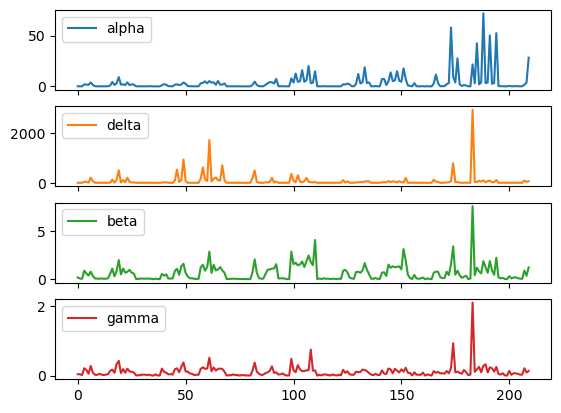

In [5]:
df.plot(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

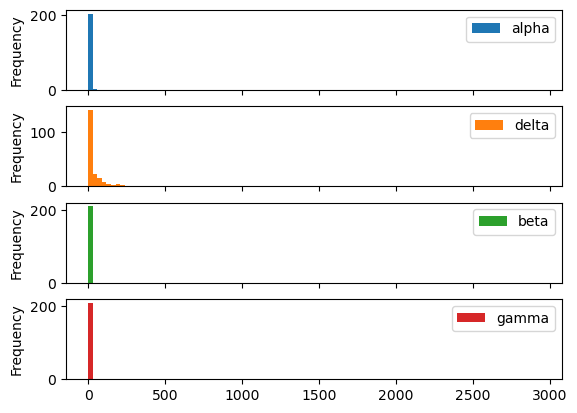

In [6]:
df.plot(kind='hist', subplots=True, bins=100)

## Transforming data

* **Goal**: "normalize" powers distribution
* boolean indexing/masking/filtering
* `.apply`
* seaborn: `distplot`
*  interpretting results, building hypotheses

<Axes: ylabel='Frequency'>

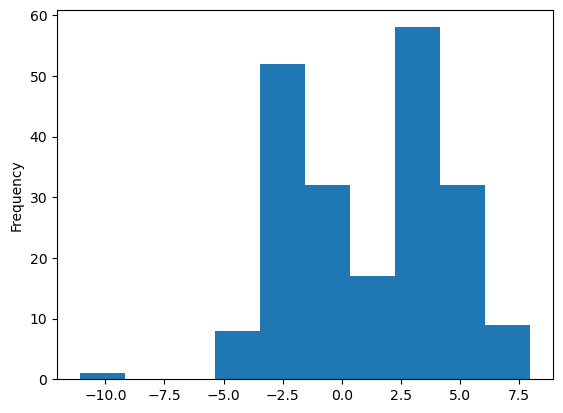

In [7]:
import numpy as np
# np.log(df['delta']).plot(kind='hist')
df = df[df['delta'] != 0]
np.log(df['delta']).plot(kind='hist')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

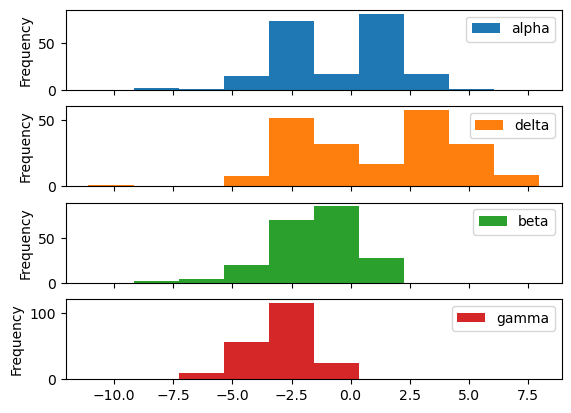

In [8]:
# solution
df_log = df.copy()

for col in ['alpha', 'delta', 'beta', 'gamma']:
    df_log[col] = np.log(df[col])
df_log.plot(kind='hist', subplots=True)

#### Exercise: adding column

Create a new column 'total_power' which is the sum of the powers across the 'alpha', 'beta', 'gamma', and 'delta' columns. Plot the histogram

<Axes: ylabel='Frequency'>

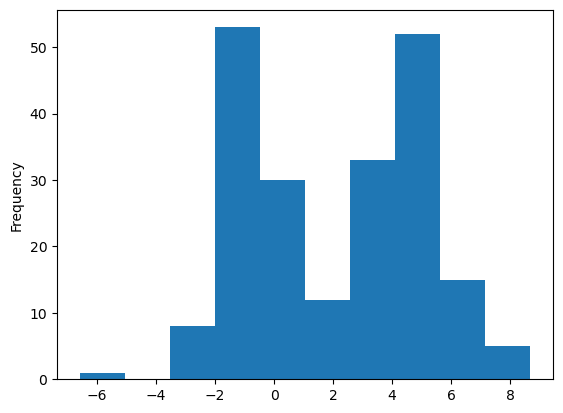

In [9]:
df_log['total_power'] = np.log(df['alpha'] + df['delta'] + df['gamma'] + df['delta'])
df_log['total_power'].plot(kind='hist')

## Scatter plots

*  **Goal**: identify dependencies between continous variables (powers)
* `.plot.scatter` or `.plot(kind='scatter', ...)`
* refine hypotheses

<Axes: xlabel='alpha', ylabel='delta'>

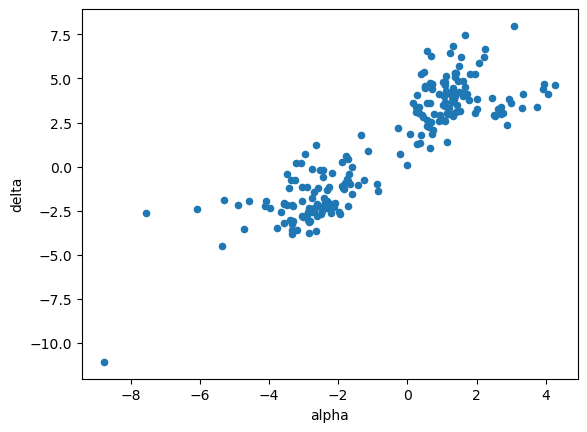

In [10]:
df_log.plot(kind='scatter', x='alpha', y='delta')

#### Exercise: plotting

We have the following dataset:

```
data = {
    'Value': np.random.randn(100),
    'Other Value': np.random.randn(100),
    'Category': np.random.choice(['A', 'B', 'C'], size=100)
}
df = pd.DataFrame(data)
```

Match the graphs and the plotting functions:

1) ```python
   df.plot(y='Value')
   ```

3) ```python
   df.plot(kind='scatter', x='Other Value', y='Value')
   ```

5) ```python
   df['Value'].plot.hist(bins=20, title='Histogram')
   ```

7)
   ```python
   bar_data = df.groupby('Category')['Value'].mean()
   bar_data.plot(kind='bar', ax=axes[1,0])
   ```



![](graphs.svg)

## Splitting data

* **Goal**: split data into distinct groups based on data (stratification)
* boolean indexing
* `.isin`


/home/bartosz/.pyenv/versions/miniconda3-latest/envs/eitn-school-2023/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='alpha', ylabel='delta'>

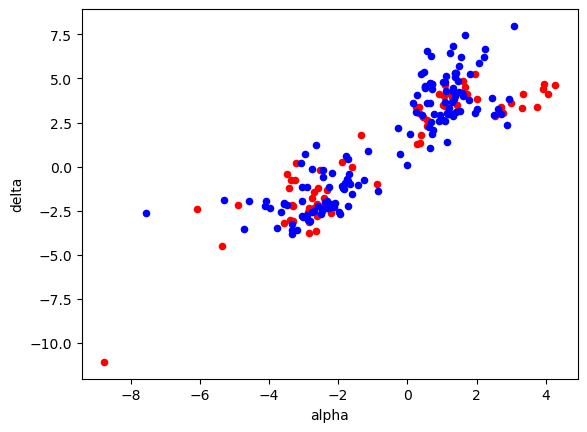

In [11]:
is_drowsy = df_log['state'] == 'drowsy'
ax = df_log[is_drowsy].plot(kind='scatter', x='alpha', y='delta', c='r')
df_log[~is_drowsy].plot(kind='scatter', x='alpha', y='delta', c='b', ax=ax)

## Compare groups

* **Goal**: 
  - 1) explore dependencies between categorical and continuous variables 
  - 2) identify causes for underlying variability in CV (stratification)
* `.groupby`
* `.plot.bar`
* **Excercise**: powers vs electrodes


<Axes: xlabel='channel'>

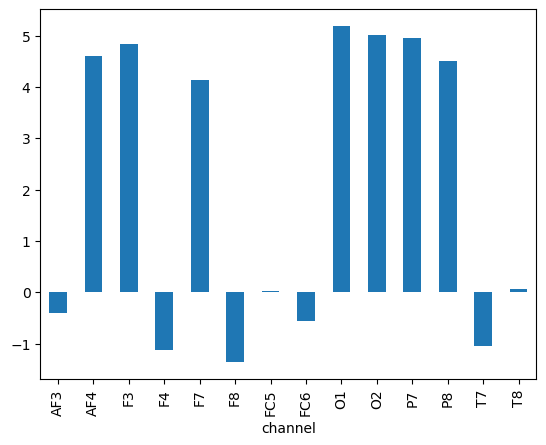

In [12]:
df_log.groupby('channel')['total_power'].mean().plot(kind='bar')

**Excercise** Redo the scatter graph for low- and high channels.

/home/bartosz/.pyenv/versions/miniconda3-latest/envs/eitn-school-2023/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='alpha', ylabel='delta'>

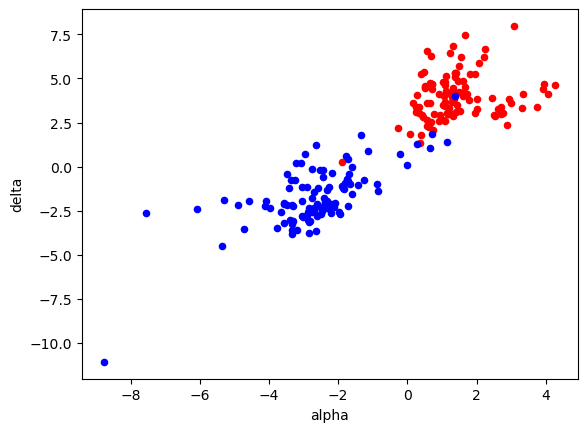

In [13]:
high_channels = ['AF4', 'F3', 'F7', 'O1', 'O2', 'P7', 'P8']
is_high = df_log['channel'].isin(high_channels)
ax = df_log[is_high].plot(kind='scatter', x='alpha', y='delta', c='r')
df_log[~is_high].plot(kind='scatter', x='alpha', y='delta', c='b', ax=ax)

## Predicting the state

### preprocess data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting the feature columns and target column
X = df_log[['alpha', 'delta', 'beta', 'gamma']]
y = df_log['state']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### fit model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.3333333333333333

#### Exercise: improving accuracy

1) What is chance accuracy level for this problem?
2) What is the accuracy if we apply the analysis only to high channels?